<a href="https://colab.research.google.com/github/HolyMuchii/ProcesamientoImagenesTPs/blob/main/TP3_Murilo_Alves_Lima.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Práctico TP3 (Aritmética de Pixeles)
### La actividad propuesta debe permitir seleccionar dos imágenes y con estas poder acceder a un menú que permita realizar las siguientes operaciones entre estas:
* En espacio RGB:

Sumas y restas: clampeada y promediada
* Es espacio YIQ:
Sumas y Restas: clampeada, promediada, if-ligther, if-darker

### El resultado de estas se debe guardar como una nueva imagen.
Se deben mostrar los resultados de todas las operaciones mencionadas.

Nota: leer cuidadosamente en la teoría las pautas que debe tener cada una de estas operaciones. Las operaciones deben ser realizadas como funciones desarrolladas por ustedes NO mediante funciones de librerías que ya las realicen.

In [3]:
!git clone https://github.com/HolyMuchii/ProcesamientoImagenesTPs.git

Cloning into 'ProcesamientoImagenesTPs'...
remote: Enumerating objects: 26, done.
remote: Counting objects: 100% (26/26), done.
remote: Compressing objects: 100% (24/24), done.
remote: Total 26 (delta 8), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (26/26), done.


In [4]:
import matplotlib.pyplot as plt
import numpy as np
import imageio as io

In [5]:
image1 = io.imread("ProcesamientoImagenesTPs/IMG_0616.JPG")
image2 = io.imread("ProcesamientoImagenesTPs/IMG_2766.JPG")

## Análisis de los resultados:

#### Imágenes iniciales (1 y 2) utilizadas

<img src="https://github.com/HolyMuchii/ProcesamientoImagenesTPs/blob/main/IMG_0616.JPG?raw=true" alt="Image01" width=500>

<img src="https://github.com/HolyMuchii/ProcesamientoImagenesTPs/blob/main/IMG_2766.JPG?raw=true" alt="Image01" width=500>


## Resultado encontrado en las sumas de píxeles en los métodos descritos

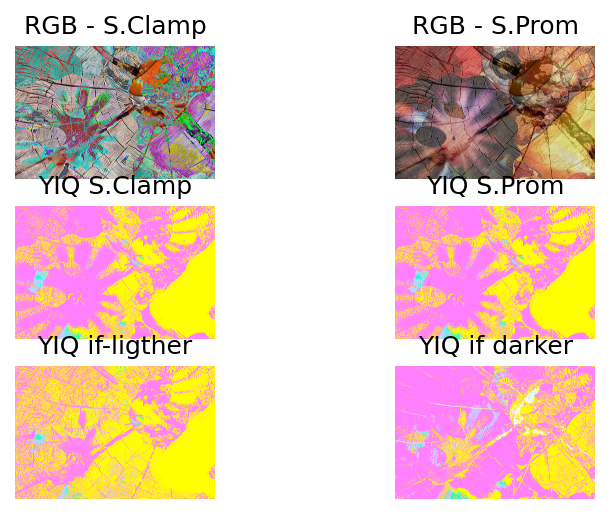

In [85]:
# código final
subp = [imageSCi,imageSPi,imageYIQSCi,imageYIQSPi,imageIFi,imageIDi]
title = ['RGB - S.Clamp','RGB - S.Prom','YIQ S.Clamp','YIQ S.Prom','YIQ if-ligther','YIQ if darker']

plt.figure(dpi=150)
for i in range(6):
  plt.subplot(3,2,(i+1))
  plt.imshow(subp[i])
  plt.title(title[i])
  plt.axis('off')
plt.show()

Evaluación general
* Las transformaciones con YIQ han provocado cambios de color y una saturación de luminancia completa que no coincide con el resultado esperado. Solo if-ligther y if-darker mostraron diferencias en sus superposiciones de imágenes

* Entre todas las imágenes, la mejor que realizó la suma fue la RGB promediada, porque las dos imágenes tienen diferentes niveles de luminancia y la más clara aparece como un filtro más transparente sobre la más oscura.
* El RGB sujeto tenía una saturación y detalles desconectados en las regiones más brillantes

## RGB - Sumas y restas: clampeada y promediada 

In [6]:
# código para individualizar componentes (RGB) de la imagen 
def image_to_rgb(image):
  r=image[:,:,0]
  g=image[:,:,1]
  b=image[:,:,2]
  return r,g,b

# código que une los componentes (RGB) para formar una imagen
def rgb_to_image(r,g,b):
  image=np.zeros((r.shape[0],r.shape[1],3))
  image[:,:,0]=r
  image[:,:,1]=g
  image[:,:,2]=b
  return image

In [21]:
# código que establece una desviación permitida para los datos, sin dejar que vaya más allá de este valor
def rgb_suma_clamp(r,g,b):
  r2=np.clip(r,0,255)
  g2=np.clip(g,0,255)
  b2=np.clip(b,0,255)
  return r2,g2,b2

In [22]:
r1,g1,b1 = image_to_rgb(image1) 
r2,g2,b2 = image_to_rgb(image2)

In [23]:
# suma de componentes individualizados
r3 = r1+r2
g3 = g1+g2
b3 = b1+b2

In [86]:
r3[0,0]

255

In [87]:
# evaluación de datos de una línea
print('Red - Suma')
print('Local Value in r3:',r3[0],'     Local Value in r1:',r1[0],'     Local Value in r2:',r2[0])
print('Max r3:',max(r3[1]),'     Min r3:',min(r3[1]))
print('')
print('Green - Suma')
print('Local Value in g3:',g3[0],'     Local Value in g1:',g1[0],'     Local Value in g2:',g2[0])
print('Max g3:',max(g3[1]),'     Min g3:',min(g3[1]))
print('')
print('Blue - Suma')
print('Local Value in b3:',b3[0],'     Local Value in b1:',b1[0],'     Local Value in b2:',b2[0])
print('Max b3:',max(b3[1]),'     Min b3:',min(b3[1]))

Red - Suma
Local Value in r3: [255 244 241 ...  94 102  98]      Local Value in r1: [107 106 106 ... 147 157 153]      Local Value in r2: [148 138 135 ... 203 201 201]
Max r3: 255      Min r3: 0

Green - Suma
Local Value in g3: [148 135 132 ... 230 240 236]      Local Value in g1: [ 0  0  0 ... 51 63 61]      Local Value in g2: [148 135 132 ... 179 177 175]
Max g3: 255      Min g3: 0

Blue - Suma
Local Value in b3: [120 107 102 ... 166 180 176]      Local Value in b1: [ 6  5  5 ... 11 27 24]      Local Value in b2: [114 102  97 ... 155 153 152]
Max b3: 255      Min b3: 0


La suma simple da como resultado una Suma Clampeada

In [25]:
imageSC = rgb_to_image(r3,g3,b3)

numpy.float64

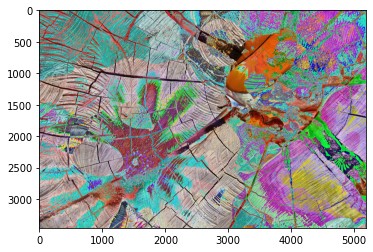

In [74]:

imageSCi = imageSC.astype(np.uint8)
plt.imshow(imageSCi)
type(imageSC[0,0,0])

#### Suma Promediada

In [27]:
# suma proporcional
r4 = (r1/2)+(r2/2)
g4 = (g1/2)+(g2/2)
b4 = (b1/2)+(b2/2)

In [28]:
# evaluación de datos
print('Red - Suma')
print('Local Value in r4:',r4[0,0],'     Local Value in r1:',r1[0,0],'     Local Value in r2:',r2[0,0])
print('Max r4:',max(r4[1]),'     Min r4:',min(r4[1]))
print('')
print('Green - Suma')
print('Local Value in g4:',g4[0,0],'     Local Value in g1:',g1[0,0],'     Local Value in g2:',g2[0,0])
print('Max g4:',max(g4[1]),'     Min g4:',min(g4[1]))
print('')
print('Blue - Suma')
print('Local Value in b4:',b4[0,0],'     Local Value in b1:',b1[0,0],'     Local Value in b2:',b2[0,0])
print('Max b4:',max(b4[1]),'     Min b4:',min(b4[1]))

Red - Suma
Local Value in r4: 127.5      Local Value in r1: 107      Local Value in r2: 148
Max r4: 245.5      Min r4: 45.0

Green - Suma
Local Value in g4: 74.0      Local Value in g1: 0      Local Value in g2: 148
Max g4: 230.0      Min g4: 5.5

Blue - Suma
Local Value in b4: 60.0      Local Value in b1: 6      Local Value in b2: 114
Max b4: 208.5      Min b4: 1.0


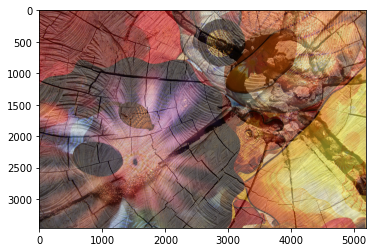

In [77]:
imageSP = rgb_to_image(r4,g4,b4)
imageSPi = imageSP.astype(np.uint8)
plt.imshow(imageSPi)


## YIQ - Sumas y Restas: clampeada, promediada, if-ligther, if-darker

In [1]:
# Transformación de RGB a YIQ
def rgb_to_yiq(r,g,b):
  y=0.299*r + 0.587*g + 0.114*b
  i=0.595716*r - 0.274453*g - 0.321263*b
  q=0.211456*r - 0.522591*g + 0.311135*b
  return y,i,q

# Estandarización de la desviación YIQ
def yiq_clip(y,i,q):
  y2=np.clip(y,0,1)
  i2=np.clip(i,-0.5957,0.5957)
  q2=np.clip(q,-0.5226,0.5226)
  return y2,i2,q2

# Transformación de YIQ a RGB
def yiq_to_rgb(y,i,q):
  r=(y + 0.9663*i + 0.6210*q)*255.0
  g=(y - 0.2721*i - 0.6474*q)*255.0
  b=(y - 1.1070*i + 1.7046*q)*255.0
  return r,g,b 

# # Estandarización de la desviación RGB
def rgb_clip(r,g,b):
  r2=np.clip(r, 0, 255)
  g2=np.clip(g, 0, 255)
  b2=np.clip(b, 0, 255)
  return r2,g2,b2

In [8]:
r1,g1,b1 = image_to_rgb(image1)
r2,g2,b2 = image_to_rgb(image2)

y1,i1,q1 = rgb_to_yiq(r1,g1,b1)
y2,i2,q2 = rgb_to_yiq(r2,g2,b2)

### Suma Clampeada

In [9]:
# Suma clampeada para Y + Suma vectorial para I y Q
y3 = y1+y2
i3 = (y1*i1+y2*i2)/(y1+y2)
q3 = (y1*q1+y2*q2)/(y1+y2)

y3,i3,q3 = yiq_clip(y3,i3,q3)

In [10]:
print('Values Max&Min Y3: ',max(y3[0]),'&',min(y3[0]),'     Values Max&Min I3: ',max(i3[0]),'&',min(i3[0]),'     Values Max&Min Q3: ',max(q3[0]),'&',min(q3[0]))

Values Max&Min Y3:  1.0 & 1.0      Values Max&Min I3:  0.5957 & 0.18355892846175684      Values Max&Min Q3:  0.5226 & -0.5226


In [11]:
r5,g5,b5 = yiq_to_rgb(y3,i3,q3)
r5,g5,b5 = rgb_clip(r5,g5,b5)

In [12]:
print('Values Max&Min R3: ',max(r5[0]),'&',min(r5[0]),'     Values Max&Min G3: ',max(g5[0]),'&',min(g5[0]),'     Values Max&Min B3: ',max(b5[0]),'&',min(b5[0]))

Values Max&Min R3:  255.0 & 255.0      Values Max&Min G3:  255.0 & 127.39259145      Values Max&Min B3:  255.0 & 0.0


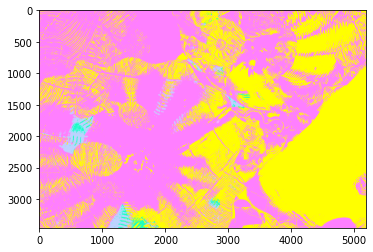

In [79]:
imageYIQSC = rgb_to_image(r5,g5,b5)
imageYIQSCi = imageYIQSC.astype(np.uint8)
plt.imshow(imageYIQSCi)

### Suma Promediada

In [14]:
# Suma Promediada para Y + Suma vectorial para I y Q
y4 = (y1+y2)/2
i4 = (y1*i1+y2*i2)/(y1+y2)
q4 = (y1*q1+y2*q2)/(y1+y2)

In [15]:
y4,i4,q4 = yiq_clip(y4,i4,q4)

In [16]:
print('Values Max&Min Y4: ',max(y4[0]),'&',min(y4[0]),'     Values Max&Min I4: ',max(i4[0]),'&',min(i4[0]),'     Values Max&Min Q4: ',max(q4[0]),'&',min(q4[0]))

Values Max&Min Y4:  1.0 & 1.0      Values Max&Min I4:  0.5957 & 0.18355892846175684      Values Max&Min Q4:  0.5226 & -0.5226


In [17]:
r6,g6,b6 = yiq_to_rgb(y4,i4,q4)
r6,g6,b6 = rgb_clip(r6,g6,b6)

In [18]:
print('Values Max&Min R6: ',max(r6[0]),'&',min(r6[0]),'     Values Max&Min G6: ',max(g6[0]),'&',min(g6[0]),'     Values Max&Min B6: ',max(b6[0]),'&',min(b6[0]))

Values Max&Min R6:  255.0 & 255.0      Values Max&Min G6:  255.0 & 127.39259145      Values Max&Min B6:  255.0 & 0.0


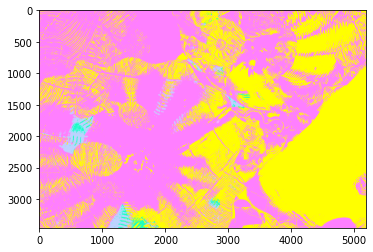

In [80]:
imageYIQSP = rgb_to_image(r6,g6,b6)
imageYIQSPi = imageYIQSP.astype(np.uint8)
plt.imshow(imageYIQSPi)

### If-ligther

In [32]:
# Cree los vectores base que recibieron los datos YIQ de if-ligther
y5=np.zeros(y1.shape)
i5=np.zeros(i1.shape)
q5=np.zeros(q1.shape)

In [33]:
print(y1.shape, y5.shape)

(3456, 5184) (3456, 5184)


In [34]:
# if-ligther
for i in range(3456):
  for j in range(5184):
    if (y1[i,j]>y2[i,j]):
      y5[i,j]=y1[i,j]
      i5[i,j]=i1[i,j]
      q5[i,j]=q1[i,j]
    else:
      y5[i,j]=y2[i,j]
      i5[i,j]=i2[i,j]
      q5[i,j]=q2[i,j]

In [36]:
y5,i5,q5 = yiq_clip(y5,i5,q5)
r7,g7,b7 = yiq_to_rgb(y5,i5,q5)
r7,g7,b7 = rgb_clip(r7,g7,b7)

In [37]:
print('Values Max&Min R7: ',max(r7[0]),'&',min(r7[0]),'     Values Max&Min G7: ',max(g7[0]),'&',min(g7[0]),'     Values Max&Min B7: ',max(b7[0]),'&',min(b7[0]))

Values Max&Min R7:  255.0 & 25.459324950000003      Values Max&Min G7:  255.0 & 127.39259145      Values Max&Min B7:  255.0 & 0.0


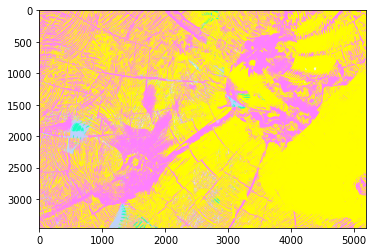

In [81]:
imageIF = rgb_to_image(r7,g7,b7)
imageIFi = imageIF.astype(np.uint8)
plt.imshow(imageIFi)

### If-darker

In [39]:
# Cree los vectores base que recibieron los datos YIQ de if-darker
y6=np.zeros(y1.shape)
i6=np.zeros(i1.shape)
q6=np.zeros(q1.shape)

In [40]:
# if-darker
for i in range(3456):
  for j in range(5184):
    if (y1[i,j]<y2[i,j]):
      y6[i,j]=y1[i,j]
      i6[i,j]=i1[i,j]
      q6[i,j]=q1[i,j]
    else:
      y6[i,j]=y2[i,j]
      i6[i,j]=i2[i,j]
      q6[i,j]=q2[i,j]

In [41]:
y6,i6,q6 = yiq_clip(y6,i6,q6)
r8,g8,b8 = yiq_to_rgb(y6,i6,q6)
r8,g8,b8 = rgb_clip(r8,g8,b8)

In [42]:
print('Values Max&Min R8: ',max(r8[0]),'&',min(r8[0]),'     Values Max&Min G8: ',max(g8[0]),'&',min(g8[0]),'     Values Max&Min B8: ',max(b8[0]),'&',min(b8[0]))

Values Max&Min R8:  255.0 & 25.459324950000003      Values Max&Min G8:  255.0 & 127.39259145      Values Max&Min B8:  255.0 & 0.0


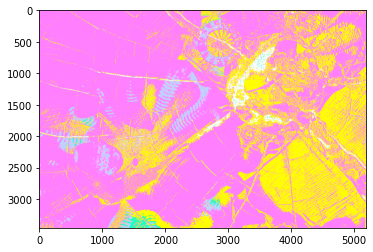

In [82]:
imageID = rgb_to_image(r8,g8,b8)
imageIDi = imageID.astype(np.uint8)
plt.imshow(imageIDi)

## Evaluación general:

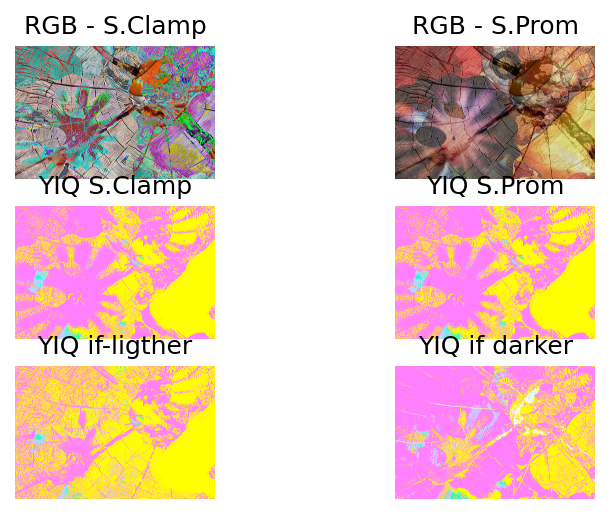

In [83]:
# Presentación de datos
subp = [imageSCi,imageSPi,imageYIQSCi,imageYIQSPi,imageIFi,imageIDi]
title = ['RGB - S.Clamp','RGB - S.Prom','YIQ S.Clamp','YIQ S.Prom','YIQ if-ligther','YIQ if darker']

plt.figure(dpi=150)
for i in range(6):
  plt.subplot(3,2,(i+1))
  plt.imshow(subp[i])
  plt.title(title[i])
  plt.axis('off')
plt.show()

